In [1]:
import pylab as plt
import xarray as xr
from pathlib import Path
import geopandas as gp
import rioxarray as rxr
import geopandas as gp
from pism_ragis.processing import preprocess_nc

In [2]:
kg2cmsle = 1 / 1e12 * 1.0 / 362.5 / 10.0
gt2cmsle = 1 / 362.5 / 10.0

In [3]:
data_dir = Path("/mnt/storstrommen/ragis/data/pism")
assert data_dir.exists()

In [4]:
exp = {"proj_dir": "2024_02_grimp",
    "scalar_dir": "scalar",
    "scalar_processed_dir": "scalar_processed",
    "resolution": 900,
    "spatial_dir": "spatial"}

In [5]:
spatial_url = data_dir / Path(exp["proj_dir"]) / Path(exp["spatial_dir"])

In [6]:
spatial_urls = spatial_url.glob(f"""ex_gris_g{exp["resolution"]}m*.nc""")

In [7]:
ds = xr.open_mfdataset(spatial_urls, preprocess=preprocess_nc, concat_dim="exp_id", combine="nested", parallel=True)

In [8]:
basins = gp.read_file("../data/basins/Greenland_Basins_PS_v1.4.2.shp").to_crs("EPSG:3413")

In [9]:
ds.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
ds.rio.write_crs("epsg:3413", inplace=True)

<xarray.Dataset>
Dimensions:                                         (time: 480, exp_id: 3,
                                                     nv: 2, x: 1760, y: 3040)
Coordinates:
  * time                                            (time) datetime64[ns] 198...
    mapping                                         int64 0
  * x                                               (x) float64 -6.782e+05 .....
  * y                                               (y) float64 -3.371e+06 .....
  * exp_id                                          (exp_id) <U19 'BAYES-MEDI...
Dimensions without coordinates: nv
Data variables: (12/25)
    time_bounds                                     (exp_id, time, nv) datetime64[ns] dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    pism_config                                     (exp_id) int8 0 0 0
    run_stats                                       (exp_id) float64 0.0 0.0 0.0
    timestamp                                       (exp_id, time) timedelta64[ns] dask.array<chunksize=(1, 480), meta=np.ndarray>
    dHdt                                            (exp_id, time, y, x) float32 dask.array<chunksize=(1, 1, 1014, 587), meta=np.ndarray>
    flux_divergence                                 (exp_id, time, y, x) float32 dask.array<chunksize=(1, 1, 1014, 587), meta=np.ndarray>
    ...                                              ...
    tendency_of_ice_mass_due_to_surface_mass_flux   (exp_id, time, y, x) float32 dask.array<chunksize=(1, 1, 1014, 587), meta=np.ndarray>
    thk                                             (exp_id, time, y, x) float32 dask.array<chunksize=(1, 1, 1014, 587), meta=np.ndarray>
    usurf                                           (exp_id, time, y, x) float32 dask.array<chunksize=(1, 1, 1014, 587), meta=np.ndarray>
    velsurf_mag                                     (exp_id, time, y, x) float32 dask.array<chunksize=(1, 1, 1014, 587), meta=np.ndarray>
    vonmises_calving_rate                           (exp_id, time, y, x) float32 dask.array<chunksize=(1, 1, 1014, 587), meta=np.ndarray>
    sle                                             (exp_id, time, y, x) float32 dask.array<chunksize=(1, 1, 1014, 587), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    command:       /home1/aaschwan/local/pism-dev/bin/pismr -profile /nobacku...
    history:      aaschwan@r445i4n7 2024-03-01 19:25:16 PST: PISM (2024-02-15...
    institution:  University of Alaska Fairbanks
    proj:         epsg:3413
    source:       PISM (2024-02-15-da843103f committed by Constantine Khrulev...

In [10]:
c = ds["sle"].rio.clip(basins.geometry)

In [11]:
cc = c.sum(dim=["x", "y"])


In [12]:
d = cc.compute()

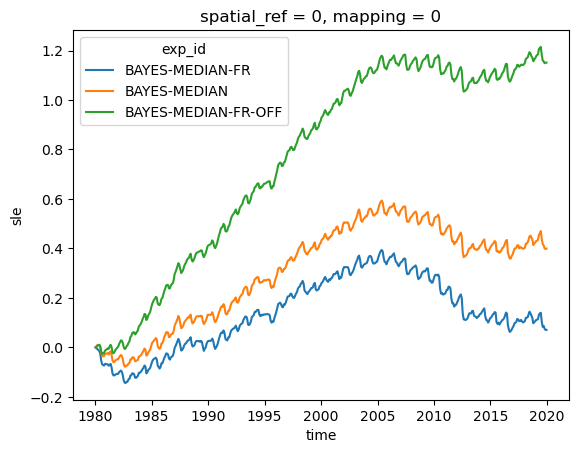

In [16]:
d.plot.line(x="time", hue="exp_id")

In [15]:
ds["sle"].attrs["units"] = "cm SLE"